# Reference - Root Sum of Squares

This notebook illustrates how the test set reference, which is only available to the challenge organziers, was computed. The 50 initial and last slices in the frequency-encoded direction are discarded to account for slices with little anatomical structures present.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

import os
import glob
import h5py
import zipfile
import sys
sys.path.append("../../Modules/")
from zero_filled_rec import zero_filled_reconstruction

In [2]:
crop = (50,-50) # slices to crop

# Make directory for saving references
results_folder = "reference"

folders = [results_folder]

for ii in folders:
    try:
        os.mkdir(ii)
    except:
        pass

## 12-channel

Number of files: 50
/media/roberto/ROBERTO/CC-359-reconstruction-data/HDF5/12-channel/Test/e15768s3_P07168.7.h5


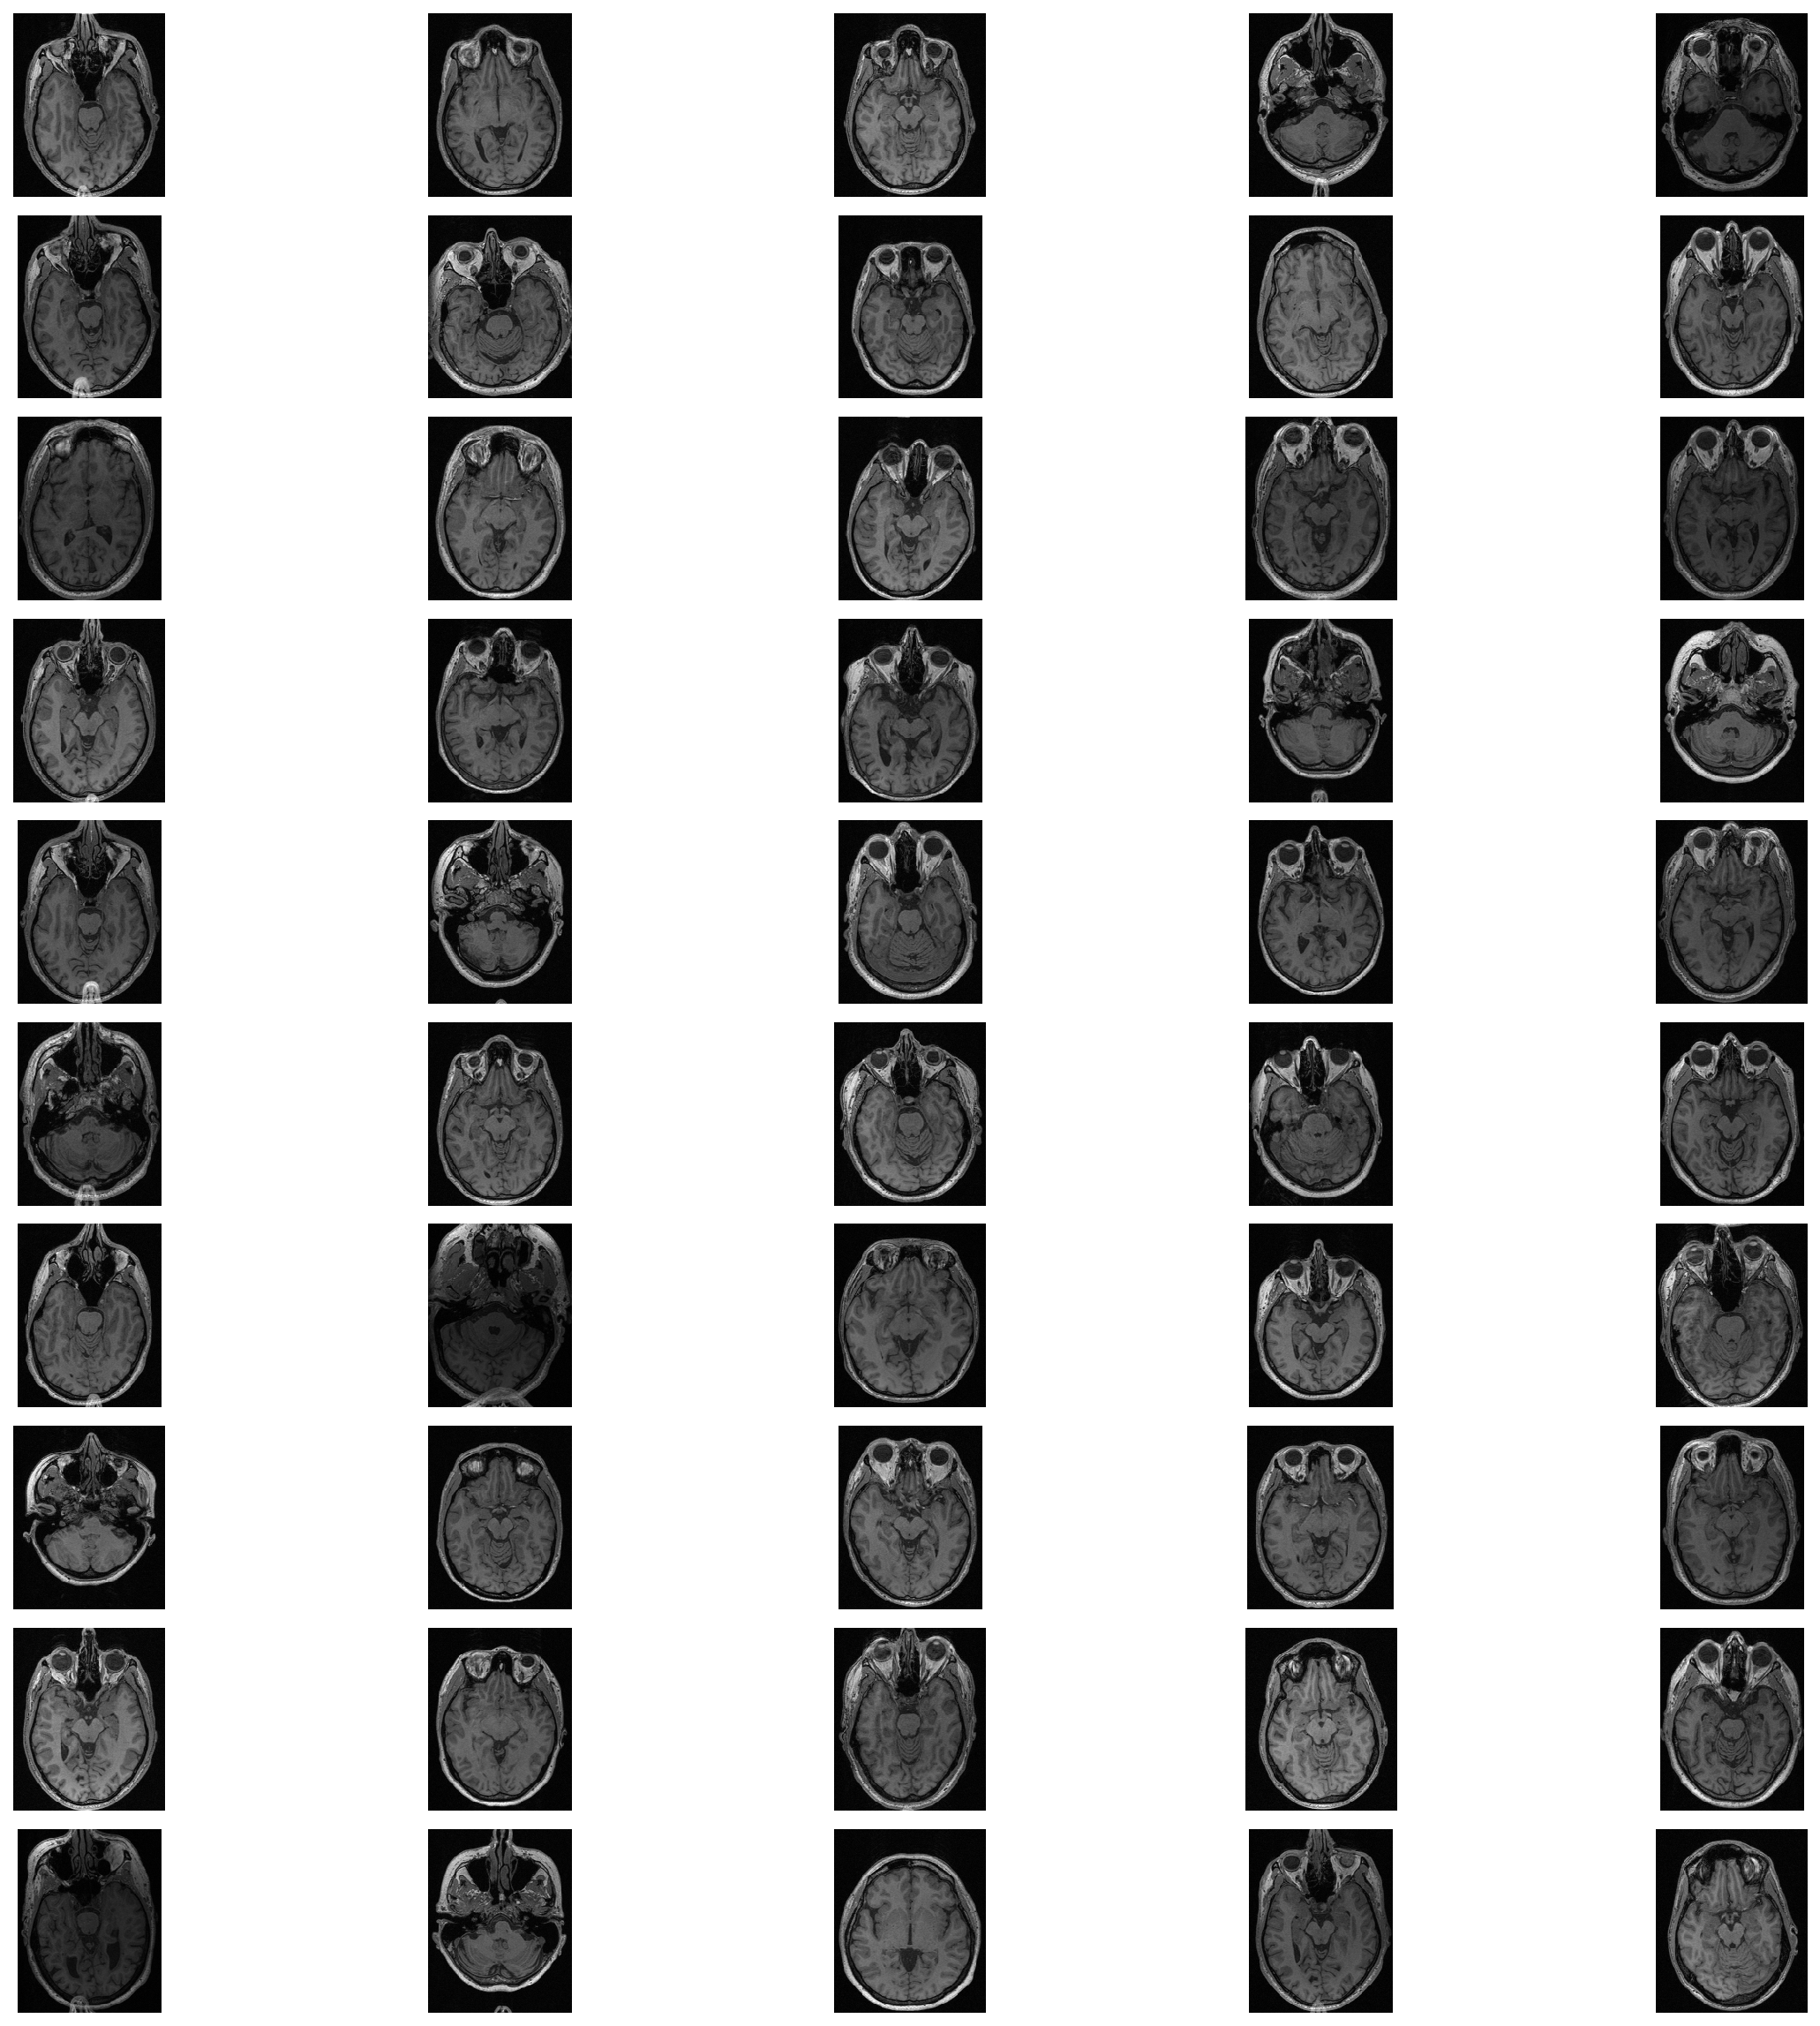

In [3]:
# Create 12-channel reference folder
c12 = "reference/12-channel"
try:
    os.mkdir(c12)
except:
    pass
    

# List test set files    
test_12c = glob.glob("/media/roberto/ROBERTO/CC-359-reconstruction-data/HDF5/12-channel/Test/*.h5")
print("Number of files:",len(test_12c))
print(test_12c[0])

# Plot central slice for each reconstruction
plt.figure(figsize = (20,20),dpi = 150)
gs1 = gridspec.GridSpec(10,5)
gs1.update(wspace=0.002, hspace=0.1)

slice_index = 90

for (jj,ii) in enumerate(test_12c):
    # Load data
    with h5py.File(ii, 'r') as f:
        kspace = f['kspace'][crop[0]:crop[1]]
        kspace[:,:,145:,:] = 0
        rec = zero_filled_reconstruction(kspace) # reconstruct
    
    plt.subplot(gs1[jj])
    plt.imshow(rec[slice_index],cmap = "gray")
    plt.axis("off")
    
    name  = ii.split("/")[-1] # file name
    
    # Save reference
    hf = h5py.File(os.path.join(c12,name), 'w')
    hf.create_dataset('reconstruction', data=rec)
    hf.close()

plt.show()

## 32-channel

Number of files: 50
/media/roberto/ROBERTO/CC-359-reconstruction-data/HDF5/32-channel/Test/e16629s13_P30720.7.h5


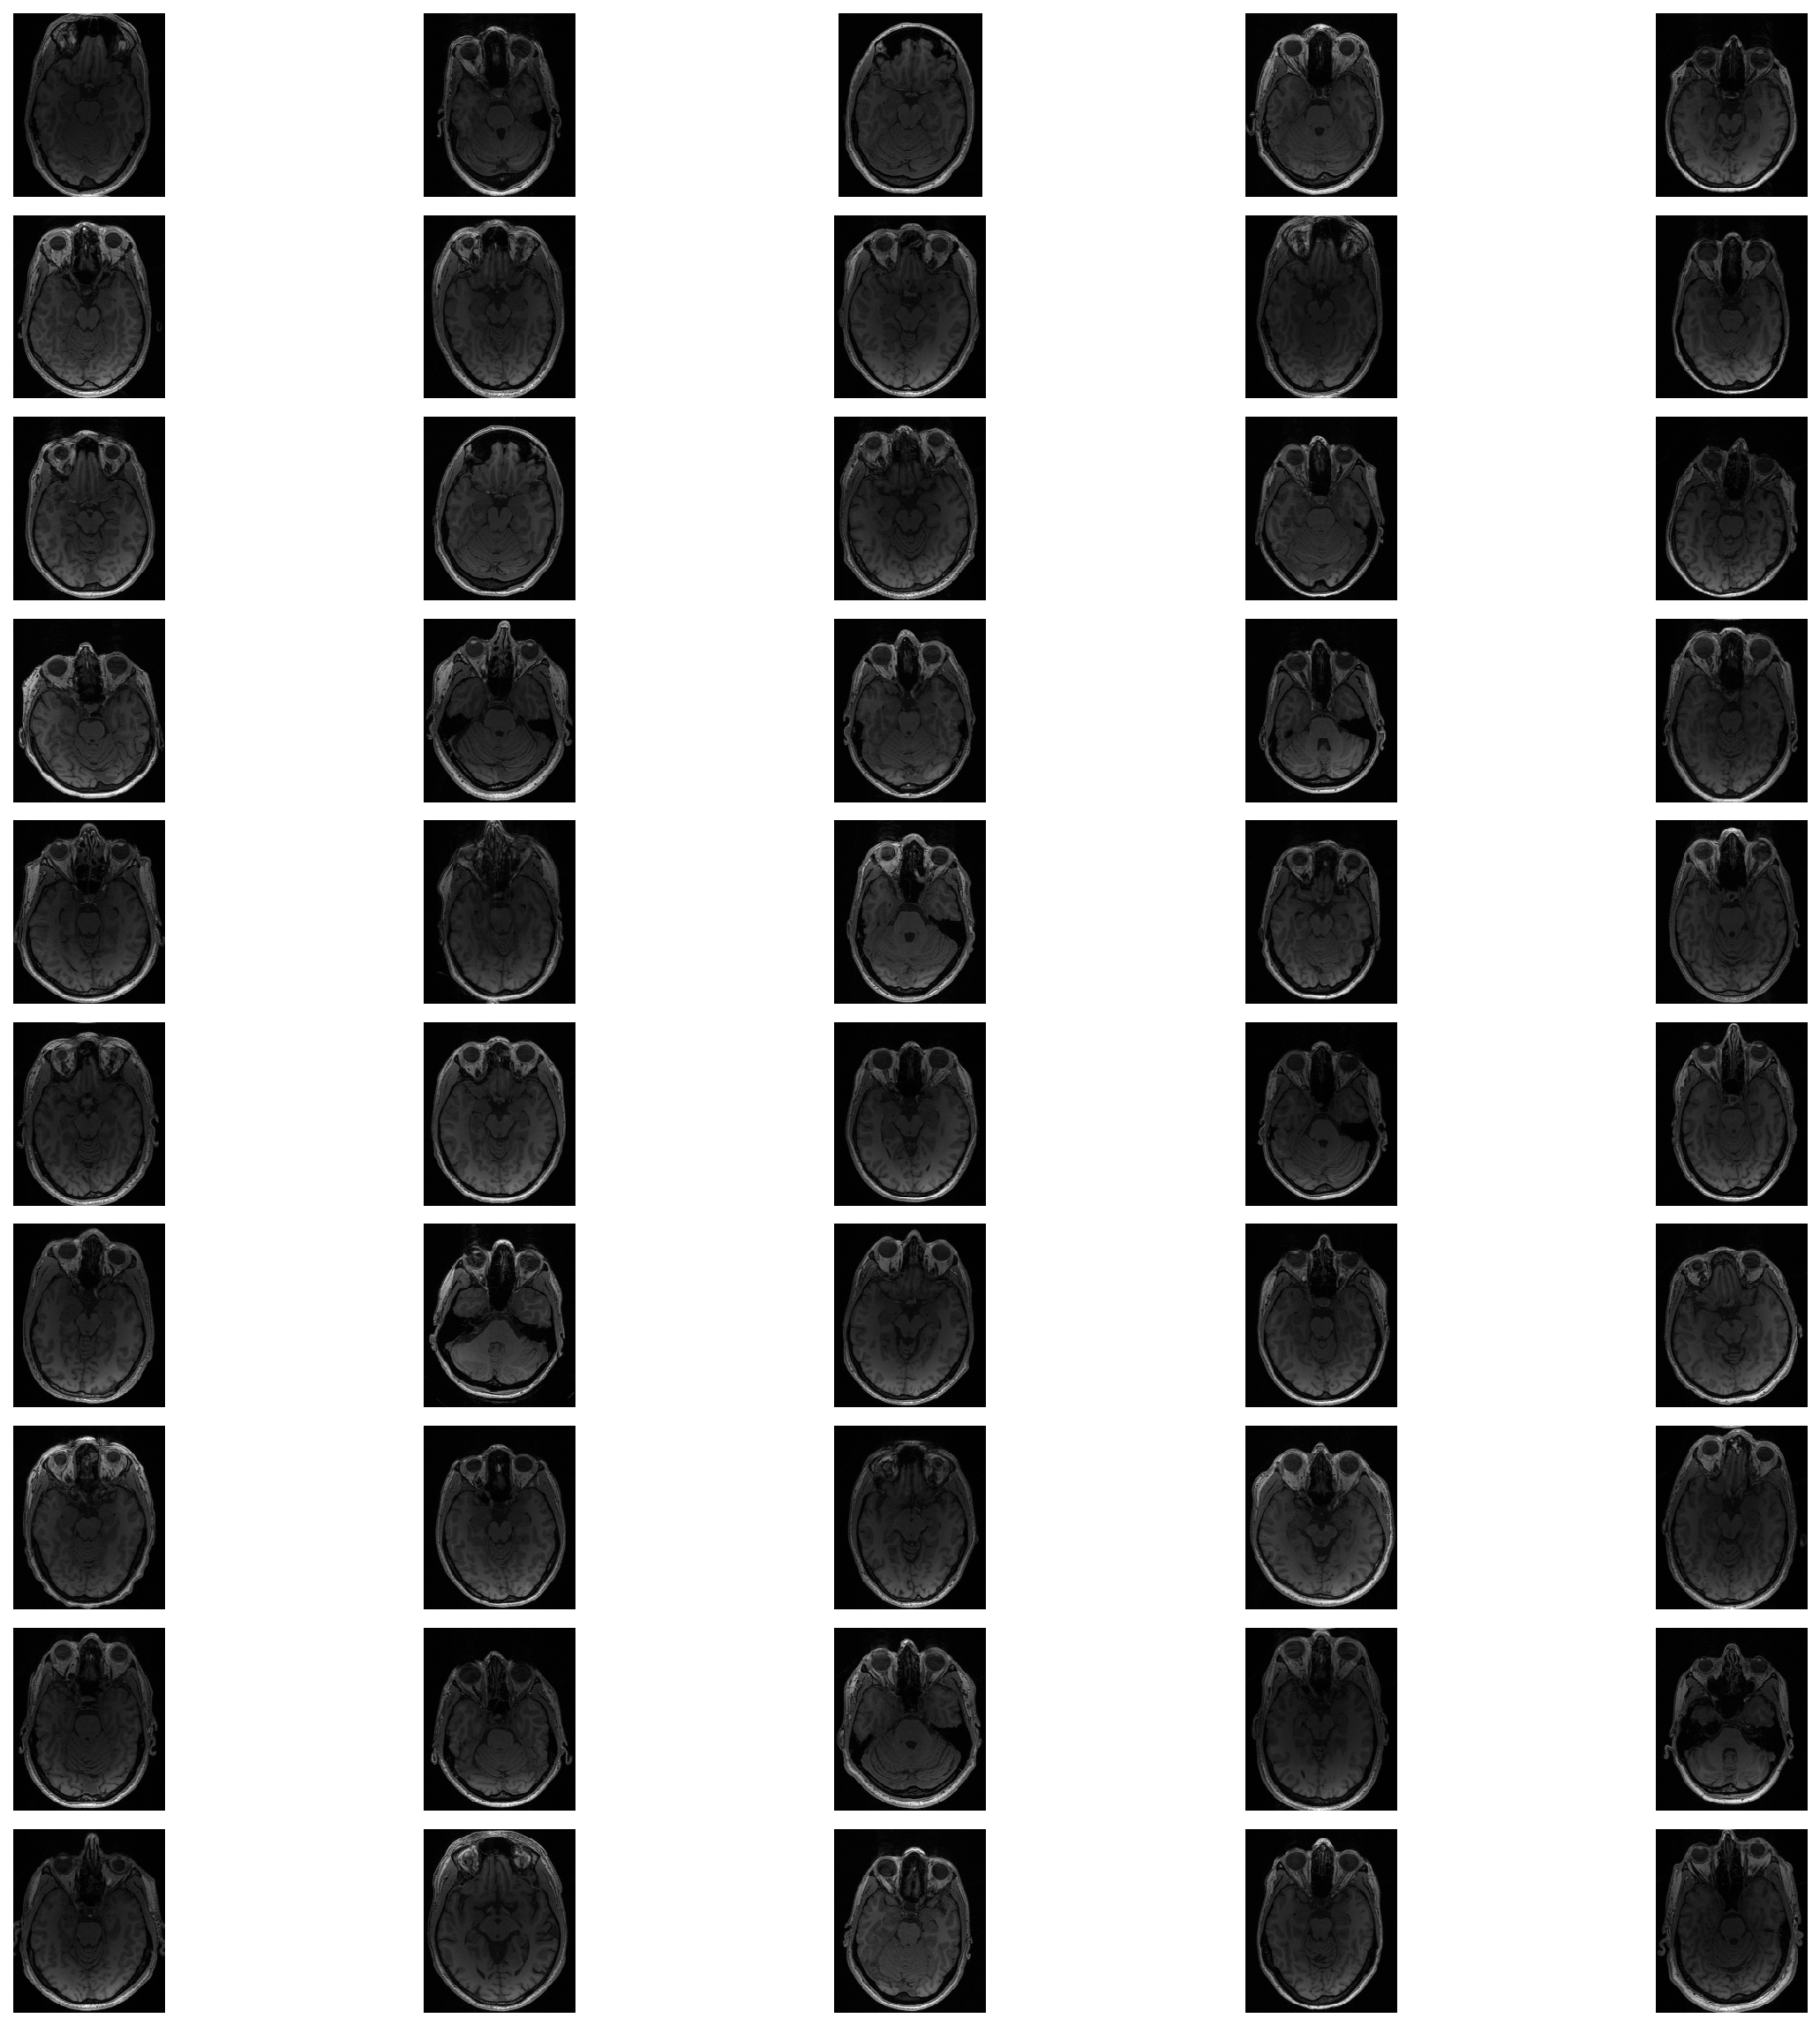

In [4]:
# Create 32-channel reference folder
c32 = "reference/32-channel"
try:
    os.mkdir(c32)
except:
    pass
    

# List test set files    
test_32c = glob.glob("/media/roberto/ROBERTO/CC-359-reconstruction-data/HDF5/32-channel/Test/*.h5")
print("Number of files:",len(test_32c))
print(test_32c[0])

# Plot central slice for each reconstruction
plt.figure(figsize = (20,20),dpi = 150)
gs1 = gridspec.GridSpec(10, 5)
gs1.update(wspace=0.002, hspace=0.1)

slice_index = 95

for (jj,ii) in enumerate(test_32c):
    # Load data
    with h5py.File(ii, 'r') as f:
        kspace = f['kspace'][crop[0]:crop[1]].astype(np.float32)
        kspace[:,:,145:,:] = 0
        rec = zero_filled_reconstruction(kspace) # reconstruct
        
    plt.subplot(gs1[jj])
    plt.imshow(rec[slice_index],cmap = "gray")
    plt.axis("off")
    
    name  = ii.split("/")[-1] # file name
    
    # Save reference
    hf = h5py.File(os.path.join(c32,name), 'w')
    hf.create_dataset('reconstruction', data=rec)
    hf.close()

plt.show()